In [1]:
import sys
sys.path.append("..")
from enhancer import *
from enhancer.options import *
from enhancer.data import * 
from enhancer.utils import *
%load_ext autoreload
%autoreload 2

In [2]:
opt_path = "../configs/smallmodel/mse_train.yml"
# dataloaders = get_dataloader_from_yml(opt_path)
pipeline =load_pipeline_from_yml("../configs/smallmodel/mse_train.yml")

loading dataloader...
loading models...
generator is loaded from /notebooks/pixelEnhancer/checkpoints/small_checkpoint_mse_x2.pt
constructing trainers .....
loading checkpoint from  /notebooks/pixelEnhancer/checkpoints/small_checkpoint_mse_x2.pt
Info :check point details are 
 epoch : 153 
 batch : -1 


In [3]:
batch_example = getsample(pipeline["loaders"]["train_dataloader"])

In [5]:
pipeline["generator"](batch_example["lr"].to(device)).shape

torch.Size([64, 3, 128, 128])

In [6]:
batch_example["lr"].shape,batch_example["hr"].shape

(torch.Size([64, 3, 64, 64]), torch.Size([64, 3, 128, 128]))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


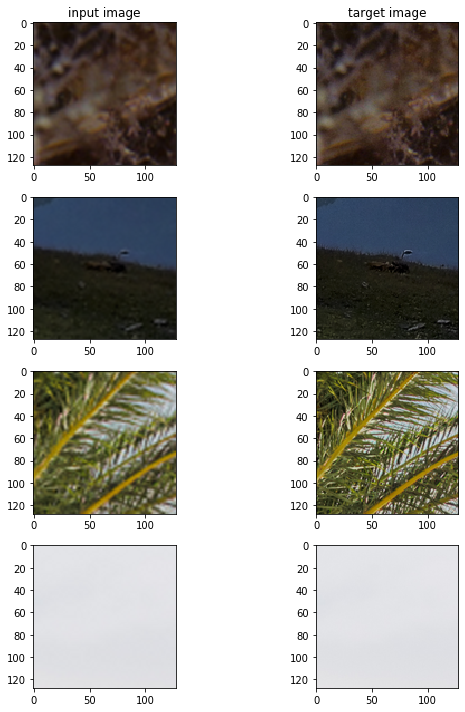

In [7]:
batch_versus_plot(
    batch_example["lr"],
    batch_example["hr"],
    preupscaling=True,
    figsize = (10,10),
    denormalize=False,
    batch_limit = 4
)

In [8]:
torch.autograd.set_detect_anomaly(True)

In [ ]:
pipeline["trainer"].train_model(1,1000)